# Markeing Final Project 

### Name = Darshan Siddhpura
### Student ID = 0774684

## Subject 
### How to identify overall response of customers towards the product based on the comments using Sentiment Analysis.

In [1]:
# Basic Operation

import pandas as pd
import numpy as np
import nltk


# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re

# Split Data 
from sklearn.model_selection import train_test_split 

# Handling Imbalanced
from imblearn.over_sampling import SMOTE 

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Performance Metrics  
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score 


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


In [2]:
#Data
df=pd.read_csv("review_data.csv")

## EDA

In [3]:
df.head()

,app_id,author,rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at
0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,"August 6, 2020",Great and super fast customer service! Highly ...,0,NaN,NaN
1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,"August 4, 2020","Still setting up my store, and after initially...",0,NaN,NaN
2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,"August 4, 2020","This is an excellent search app, which they ha...",0,NaN,NaN
3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,"July 30, 2020","A+, great great great customer service! thanks...",0,NaN,NaN
4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,"July 28, 2020","I'm begginig to use this app, the search engin...",0,NaN,NaN


In [4]:
#Shape of the data
df.shape

(4999, 8)

In [5]:
# showing null values of data
print(df.isnull().sum()) 

app_id                          0
author                          0
rating                          0
posted_at                       0
body                            6
helpful_count                   0
developer_reply              4421
developer_reply_posted_at    4421
dtype: int64


Total number of sentiments of shopify :
5    3039
4    1225
1     350
3     289
2      96
Name: rating, dtype: int64


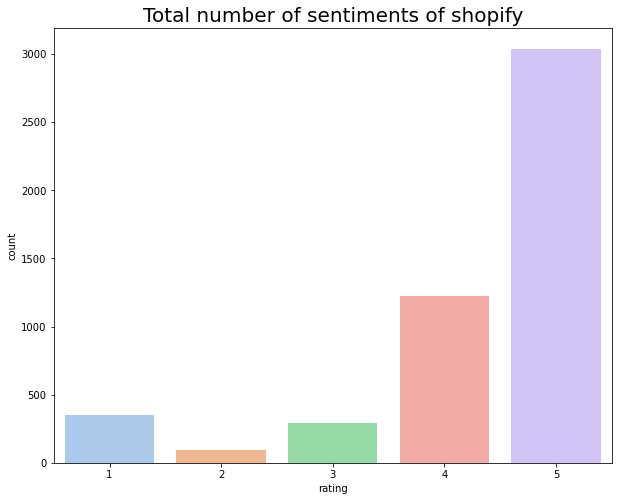

In [6]:
#checking the Total Number of Null Values in dataset. using bar plot

cprint("Total number of sentiments of shopify :",'red')
print(df.rating.value_counts())

plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'rating', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of shopify', fontsize = 20)

plt.show()

In [7]:
# Spliting Rating Numbers into text Sentiments

very_positive = df[df['rating'] == 'very_positive']
positive = df[df['rating'] == 'positive']
neutral = df[df['rating'] == 'neutral']
negative = df[df['rating'] == 'negative']
very_negative = df[df['rating'] == 'very_negative']


In [8]:
# Creating the Function for converting 1,2,3,4,5 ratings into Sentiments.

def convert_Sentiment(sentiment):
    if  sentiment == 5:
        return "very positive"
    elif sentiment == 4:
        return "positive"
    elif sentiment == 3:
        return "neutral"
    elif sentiment == 2:
        return "negative"
    elif sentiment == 1:
        return "very negative"

In [9]:
# Apply convert_Sentiment function (Converting the values)
df.rating = df.rating.apply(lambda x : convert_Sentiment(x))

In [10]:
df.rating

0       very positive
1       very positive
2       very positive
3       very positive
4       very positive
            ...      
4994    very positive
4995    very positive
4996    very negative
4997          neutral
4998         positive
Name: rating, Length: 4999, dtype: object

In [11]:
# Ceated the all neccessory functions to Removing the unneccessory part in comments.

# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [12]:
# converting the deconstract words to consturct word. such as ( won't >> will not have ).

# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

In [13]:
# combaine negative reason with  Reviews (if exsist)

df['final_text'] = df['body'].fillna('') + ' ' + df['rating'] 

# Apply functions on reviews

df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [14]:
# result
df['final_text']

0       great super fast customer service highly custo...
1       still setting store initially paying another s...
2       excellent search app well designed functions h...
3       great great great customer service thanks matt...
4       begginig use app search engine intuitive easy ...
                              ...                        
4994              app works well couldnt happier positive
4995    thank free app think definitely improve conver...
4996    everything app broken charged something wasnt ...
4997    merci il nous demande de mettre un commentaire...
4998    en tant que site europ en j utilise cette appl...
Name: final_text, Length: 4999, dtype: object

In [15]:
df

,app_id,author,rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at,final_text
0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,very positive,"August 6, 2020",Great and super fast customer service! Highly ...,0,NaN,NaN,great super fast customer service highly custo...
1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,very positive,"August 4, 2020","Still setting up my store, and after initially...",0,NaN,NaN,still setting store initially paying another s...
2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,very positive,"August 4, 2020","This is an excellent search app, which they ha...",0,NaN,NaN,excellent search app well designed functions h...
3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,very positive,"July 30, 2020","A+, great great great customer service! thanks...",0,NaN,NaN,great great great customer service thanks matt...
4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,very positive,"July 28, 2020","I'm begginig to use this app, the search engin...",0,NaN,NaN,begginig use app search engine intuitive easy ...
...,...,...,...,...,...,...,...,...,...
4994,b13f9c06-c950-419e-ab51-a8b73cd55738,Southinc,very positive,"April 3, 2018",the app works very well and i couldnt be happier,0,NaN,NaN,app works well couldnt happier positive
4995,b13f9c06-c950-419e-ab51-a8b73cd55738,Jchats,very positive,"April 3, 2018",THANK YOU FOR FREE APP.\nI THINK THIS DEFINITE...,0,NaN,NaN,thank free app think definitely improve conver...
4996,b6ffbeed-97f5-4209-98ac-adb832bdbc8f,DeBonáir Suavé,very negative,"March 1, 2019",EVERYTHING ON THIS APP IS BROKEN. I WAS BEING ...,0,NaN,NaN,everything app broken charged something wasnt ...
4997,94e77128-9474-4076-b4a1-2ac6b880c8f3,Tech-accessoire,neutral,"March 30, 2019",Merci il nous demande de mettre un commentair...,0,NaN,NaN,merci il nous demande de mettre un commentaire...


In [16]:
X = df['final_text']
y = df['rating']

In [17]:
# Apply TFIDF on cleaned reveiw

tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

In [18]:
#Handling imbalanced using SMOTE

smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [19]:
# Split Data into train & test 

X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2)

### Random forest

In [20]:

rf = RandomForestClassifier(random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [21]:
rf_prediction =  rf.predict(X_test)

In [22]:
accuracy_score(rf_prediction,y_test)

0.947680157946693

### XGBClassifier

In [23]:
#XGBClassifier
xgb = XGBClassifier(random_state=100)
xgb.fit(X_train,y_train)

C:\Users\acer\anaconda3\envs\DAB200\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=100, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=None, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [24]:
xgb_prediction =  xgb.predict(X_test)

In [25]:
accuracy_score(xgb_prediction,y_test)

0.9312273774267851

### GradientBoostingClassifier

In [26]:
#GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=100)
gbc.fit(X_train,y_train)


GradientBoostingClassifier(random_state=100)

In [27]:
gbc_prediction =  gbc.predict(X_test)

In [28]:
accuracy_score(gbc_prediction,y_test)

0.9104968739717012

### Support vector machine

In [29]:
#Support vector machine
svm = SVC(random_state=100)
svm.fit(X_train,y_train)

SVC(random_state=100)

In [30]:
svm_prediction =  svm.predict(X_test)

In [31]:
accuracy_score(svm_prediction,y_test)

0.9522869364922671

### Naive Bayes

In [32]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [33]:
nb_prediction =  nb.predict(X_test)

In [34]:
accuracy_score(nb_prediction,y_test)

0.8953603158933859

### Decision Tree

In [35]:
#Decision Tree
ds = DecisionTreeClassifier(random_state=100)
ds.fit(X_train,y_train)

DecisionTreeClassifier(random_state=100)

In [36]:
ds_prediction =  ds.predict(X_test)

In [37]:
accuracy_score(ds_prediction,y_test)

0.9095097071405067

In [38]:
# List of models with there respective score

models = pd.DataFrame({'Model' : [ 'Random Forest',
                                  'XGBClassifier',
                                  'GradientBoostingClassifier',
                                  'Support vector machine',
                                  'Naive Bayes',
                                  'Decision Tree'],
                       
                       'Score' : [ accuracy_score(rf_prediction,y_test),
                                  accuracy_score(xgb_prediction,y_test),
                                  accuracy_score(gbc_prediction,y_test),
                                  accuracy_score(svm_prediction,y_test),
                                  accuracy_score(nb_prediction,y_test),
                                  accuracy_score(ds_prediction,y_test)]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Support vector machine,0.952287
0,Random Forest,0.947680
1,XGBClassifier,0.931227
2,GradientBoostingClassifier,0.910497
5,Decision Tree,0.909510
4,Naive Bayes,0.895360


Classification Report:
----------------------
                precision    recall  f1-score   support

     negative       1.00      1.00      1.00       603
      neutral       1.00      1.00      1.00       634
     positive       0.84      0.90      0.87       593
very negative       1.00      1.00      1.00       602
very positive       0.90      0.84      0.86       607

     accuracy                           0.95      3039
    macro avg       0.95      0.95      0.95      3039
 weighted avg       0.95      0.95      0.95      3039



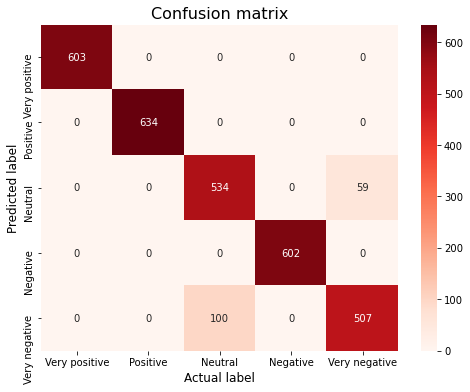

In [39]:
# top Two models who give the meximum accurate prediction 

cr = classification_report(y_test, rf_prediction)

print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,rf_prediction)

# plot confusion matrix 

plt.figure(figsize=(8,6))
sentiment_classes = ['Very positive','Positive','Neutral','Negative','Very negative']
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

Classification Report:
----------------------
                precision    recall  f1-score   support

     negative       1.00      1.00      1.00       603
      neutral       1.00      1.00      1.00       634
     positive       0.90      0.85      0.87       593
very negative       1.00      1.00      1.00       602
very positive       0.86      0.91      0.88       607

     accuracy                           0.95      3039
    macro avg       0.95      0.95      0.95      3039
 weighted avg       0.95      0.95      0.95      3039



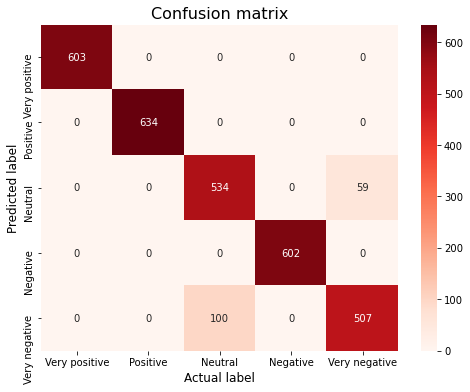

In [40]:
cr = classification_report(y_test, svm_prediction)

print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,rf_prediction)

# plot confusion matrix 

plt.figure(figsize=(8,6))
sentiment_classes = ['Very positive','Positive','Neutral','Negative','Very negative']
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

## Conclusion

### here, we can clearly say that, sanderd vector machine and random forest. both the machine learning techhniques give the accurate prediction to identify overall response of customers towards the product based on the comments.